## Image Classification with Convolutional Neural Networks (CNNs) using TensorFlow

### (1) Importing the necessary libraries

In [1]:
from platform import python_version
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

print("Python version:", python_version())
print("TensorFlow version:", tf.__version__)

Python version: 3.9.13
TensorFlow version: 2.19.0


### (2) Loading and initial exploration of data

In [2]:
(images_training, labels_training), (images_testing, labels_testing) = datasets.cifar10.load_data()

classification_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### (3) Image pre-processing

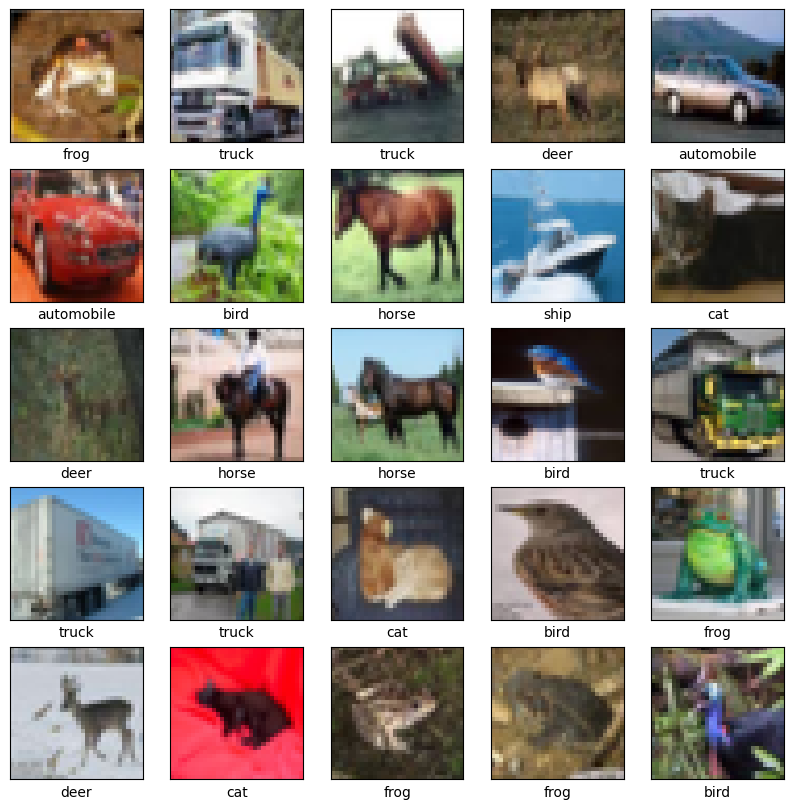

In [3]:
images_training = images_training / 255.0
images_testing = images_testing / 255.0

def visualize_images(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(classification_names[labels[i][0]])

visualize_images(images_training, labels_training)

### (4) Building and Training the Model

In [4]:
classification_model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

classification_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,418 (286.79 KB)

 Trainable params: 73,418 (286.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
classification_model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy', 
   metrics = ['accuracy']
)

history = classification_model.fit(
    images_training,
    labels_training,
    epochs = 10,
    validation_data = (images_testing, labels_testing)
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.3296 - loss: 1.8159 - val_accuracy: 0.5213 - val_loss: 1.3295
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5571 - loss: 1.2320 - val_accuracy: 0.6177 - val_loss: 1.0792
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6220 - loss: 1.0636 - val_accuracy: 0.6424 - val_loss: 1.0275
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6636 - loss: 0.9621 - val_accuracy: 0.6450 - val_loss: 1.0186
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6895 - loss: 0.8967 - val_accuracy: 0.6625 - val_loss: 0.9789
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7126 - loss: 0.8295 - val_accuracy: 0.6808 - val_loss: 0.9232
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7225 - loss: 0.7952 - val_accuracy: 0.6890 - val_loss: 0.9194
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7373 -

### (5) Performance evaluation

In [7]:
erro_testing, acc_testing = classification_model.evaluate(images_testing, labels_testing, verbose = 2)     

print(f"Accuracy with Test Data: {acc_testing}")

313/313 - 2s - 5ms/step - accuracy: 0.7012 - loss: 0.8823
Accuracy with Test Data: 0.701200008392334


### (6) Model deployment and predictions

Imported ../data/image-entry.jpg


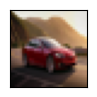

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
The input image (../data/image-entry.jpg) was classified as 'automobile'.


In [38]:
data_path = "../data/image-entry.jpg"

image_input = Image.open(data_path)
image_input = image_input.resize((32, 32))
image_input_array = np.array(image_input) / 255.0

print(f"Imported {data_path}")

plt.figure(figsize = (1,1))
plt.imshow(image_input)
plt.xticks([])
plt.yticks([])
plt.show()

image_input = np.expand_dims(image_input_array, axis=0)
predictions = classification_model.predict(image_input)

classification_answer = np.argmax(predictions)
classification_name_answer = classification_names[classification_answer]

print(f"The input image ({data_path}) was classified as '{classification_name_answer}'.")

### Testing another entry

Imported ../data/image-entry1.jpg


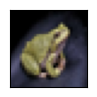

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The input image (../data/image-entry1.jpg) was classified as 'frog'.


In [40]:
data_path1 = "../data/image-entry1.jpg"

image_input1 = Image.open(data_path1)
image_input1 = image_input1.resize((32, 32))
image_input_array1 = np.array(image_input1) / 255.0

print(f"Imported {data_path1}")

plt.figure(figsize = (1,1))
plt.imshow(image_input1)
plt.xticks([])
plt.yticks([])
plt.show()

image_input1 = np.expand_dims(image_input_array1, axis=0)
predictions = classification_model.predict(image_input1)

classification_answer = np.argmax(predictions)
classification_name_answer = classification_names[classification_answer]

print(f"The input image ({data_path1}) was classified as '{classification_name_answer}'.")

Imported ../data/image-entry2.jpg


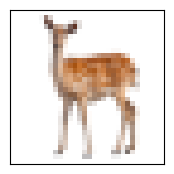

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
The input image (../data/image-entry2.jpg) was classified as 'dog'.


In [ ]:
data_path2 = "../data/image-entry2.jpg"

image_input2 = Image.open(data_path2)
image_input2 = image_input2.resize((32, 32))
image_input_array2 = np.array(image_input2) / 255.0

print(f"Imported {data_path2}")

plt.figure(figsize = (2,2))
plt.imshow(image_input2)
plt.xticks([])
plt.yticks([])
plt.show()

image_input2 = np.expand_dims(image_input_array2, axis=0)
predictions = classification_model.predict(image_input2)

classification_answer = np.argmax(predictions)
classification_name_answer = classification_names[classification_answer]

print(f"The input image ({data_path2}) was classified as '{classification_name_answer}'.")